<a href="https://colab.research.google.com/github/Emperor-tec/cs231n.github.io/blob/master/RSMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
import random as rn
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.layers import Dense, Flatten,
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Preparing the Dataset**

In [ ]:
imagepaths = []

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/final-dataset'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

1964


In [ ]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        if(image.startswith('/content/drive/MyDrive/final-dataset/good/')):
            y.append('good')
        else:
            y.append('bad')
    except:
        pass

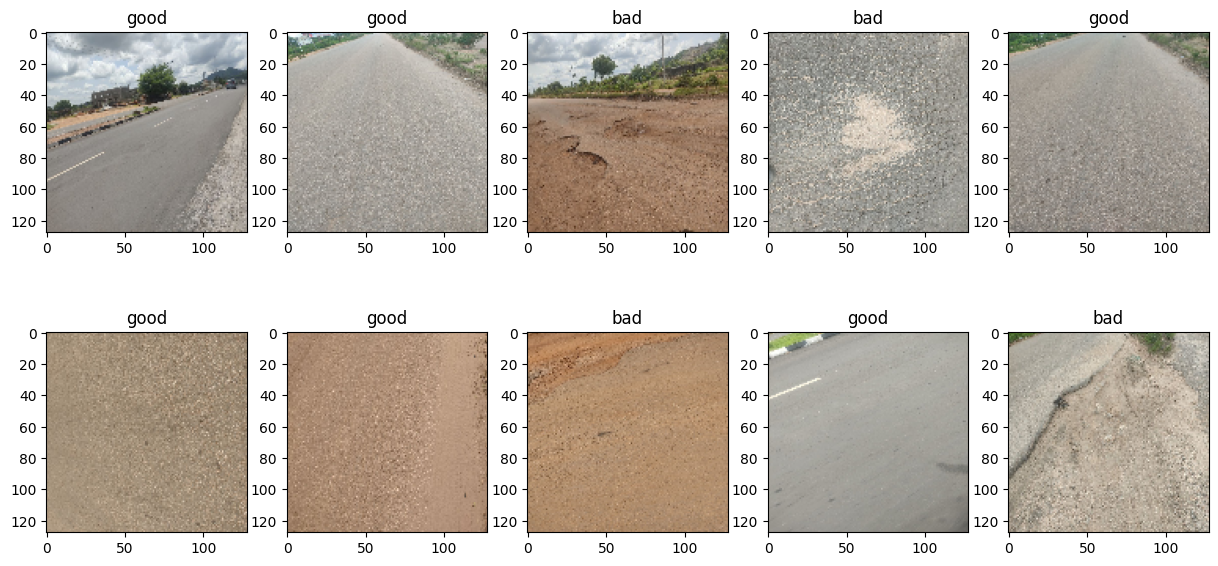

In [ ]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

# **Data Engineering**
# **Label Encoding the Y array (i.e. Negative->0, Positive->1) & then One Hot Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
X=np.array(X)

In [ ]:
print(Y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


# **Splitting into Training and Testing Sets**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (X,Y,test_size=0.30,random_state=0)

In [ ]:
x_train.shape

(1374, 128, 128, 3)

In [ ]:
# Normalize Images

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# **Data Augmentation to prevent Overfitting**

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

# **Building the CNN Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
x_train.shape

(1571, 128, 128, 3)

In [ ]:
x_test.shape

(393, 128, 128, 3)

In [ ]:
y_train.shape

(1571,)

In [ ]:
y_test.shape

(393,)

In [ ]:
# custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
import tensorflow as tf
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 128)     

In [ ]:
# history = model.fit(x_train, y_train, epochs=15, batch_size=12, verbose=2, validation_data=(x_test, y_test))
batch_size=30
epochs=15
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test), verbose = 2)

Epoch 1/15
46/46 - 10s - loss: 2.8674 - accuracy: 0.6252 - val_loss: 0.5714 - val_accuracy: 0.6983 - 10s/epoch - 217ms/step
Epoch 2/15
46/46 - 5s - loss: 0.5075 - accuracy: 0.7758 - val_loss: 0.4371 - val_accuracy: 0.7831 - 5s/epoch - 114ms/step
Epoch 3/15
46/46 - 7s - loss: 0.4837 - accuracy: 0.7496 - val_loss: 0.5170 - val_accuracy: 0.7831 - 7s/epoch - 155ms/step
Epoch 4/15
46/46 - 8s - loss: 0.4781 - accuracy: 0.7678 - val_loss: 0.5107 - val_accuracy: 0.7746 - 8s/epoch - 169ms/step
Epoch 5/15
46/46 - 5s - loss: 0.5168 - accuracy: 0.7387 - val_loss: 0.6383 - val_accuracy: 0.6136 - 5s/epoch - 114ms/step
Epoch 6/15
46/46 - 7s - loss: 0.4842 - accuracy: 0.7664 - val_loss: 0.4069 - val_accuracy: 0.8102 - 7s/epoch - 152ms/step
Epoch 7/15
46/46 - 6s - loss: 0.4238 - accuracy: 0.7955 - val_loss: 0.3701 - val_accuracy: 0.8254 - 6s/epoch - 129ms/step
Epoch 8/15
46/46 - 6s - loss: 0.4645 - accuracy: 0.7948 - val_loss: 0.4206 - val_accuracy: 0.8203 - 6s/epoch - 125ms/step
Epoch 9/15
46/46 - 7s 

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy: {:2.2f}%'.format(accuracy*100))

19/19 [==============================] - 0s 8ms/step - loss: 0.4562 - accuracy: 0.8051
Test accuracy: 80.51%


In [ ]:
prediction = model.predict(x_test)

19/19 [==============================] - 0s 5ms/step


In [ ]:
prediction

array([[1.25536723e-02],
       [1.64861977e-01],
       [1.30557539e-02],
       [8.34645748e-01],
       [1.62328601e-01],
       [3.37710814e-03],
       [8.07790518e-01],
       [8.83429527e-01],
       [8.38654399e-01],
       [7.11024225e-01],
       [4.06957746e-01],
       [7.90285647e-01],
       [1.21707946e-01],
       [8.78640473e-01],
       [2.58879125e-01],
       [1.01304641e-02],
       [7.90363252e-01],
       [3.71614605e-01],
       [1.27452910e-01],
       [2.35177591e-01],
       [4.05401038e-03],
       [2.38905326e-01],
       [8.75391066e-01],
       [6.35219276e-01],
       [2.15233669e-01],
       [5.48910379e-01],
       [9.20516193e-01],
       [4.93346989e-01],
       [4.72041130e-01],
       [2.16067322e-02],
       [1.00010082e-01],
       [4.27488834e-02],
       [1.90668657e-01],
       [7.87221968e-01],
       [1.86298043e-01],
       [1.30885551e-02],
       [7.26886280e-03],
       [2.48669416e-01],
       [6.41722620e-01],
       [8.00442994e-02],


In [ ]:
y_pred = np.argmax(prediction, axis=1)

In [ ]:
model.save('model.h5')

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

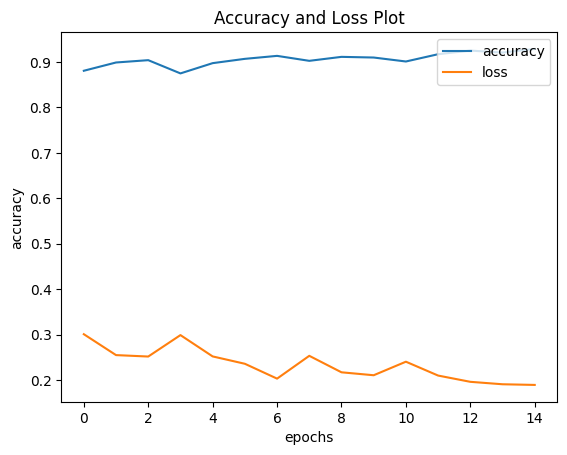

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Accuracy and Loss Plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','loss'], loc='upper right')
plt.show()

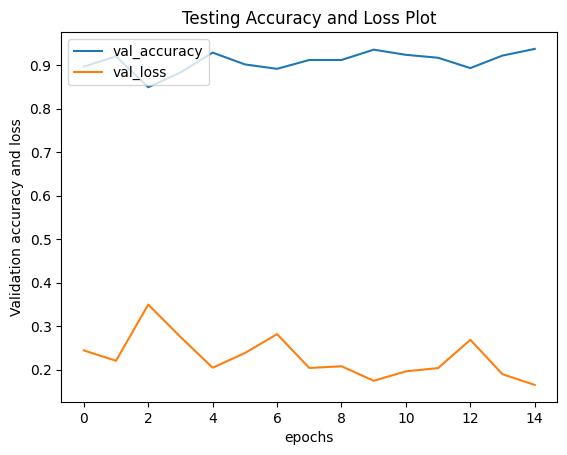

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Testing Accuracy and Loss Plot')
plt.xlabel('epochs')
plt.ylabel('Validation accuracy and loss')
plt.legend(['val_accuracy','val_loss'], loc='upper left')
plt.show()

In [ ]:
#testing the model for confusion matrix
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)

In [ ]:
pd.DataFrame(confusion_matrix(y_test2, y_pred),
             columns=["Predicted NEGATIVE", "Predicted POSITIVE"],
             index=["Actual NEGATIVE", "Actual POSITIVE"])

Predicted NEGATIVE  Predicted POSITIVE
Actual NEGATIVE                 292                  19
Actual POSITIVE                  18                 261

<Axes: >

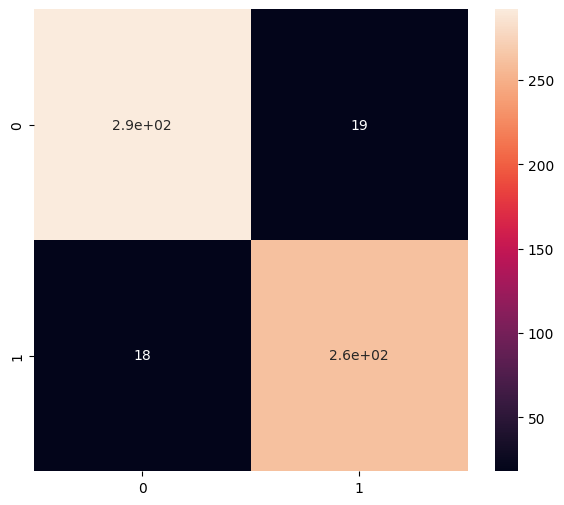

In [ ]:
import seaborn as sns
cmx = confusion_matrix(y_test2, y_pred)
# Adjust the size of the figure
plt.figure(figsize=(7, 6))
sns.heatmap(cmx, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1),y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       311
           1       0.95      0.94      0.94       279

    accuracy                           0.95       590
   macro avg       0.95      0.95      0.95       590
weighted avg       0.95      0.95      0.95       590



# **checking if the model recognize properly**

19/19 [==============================] - 0s 8ms/step


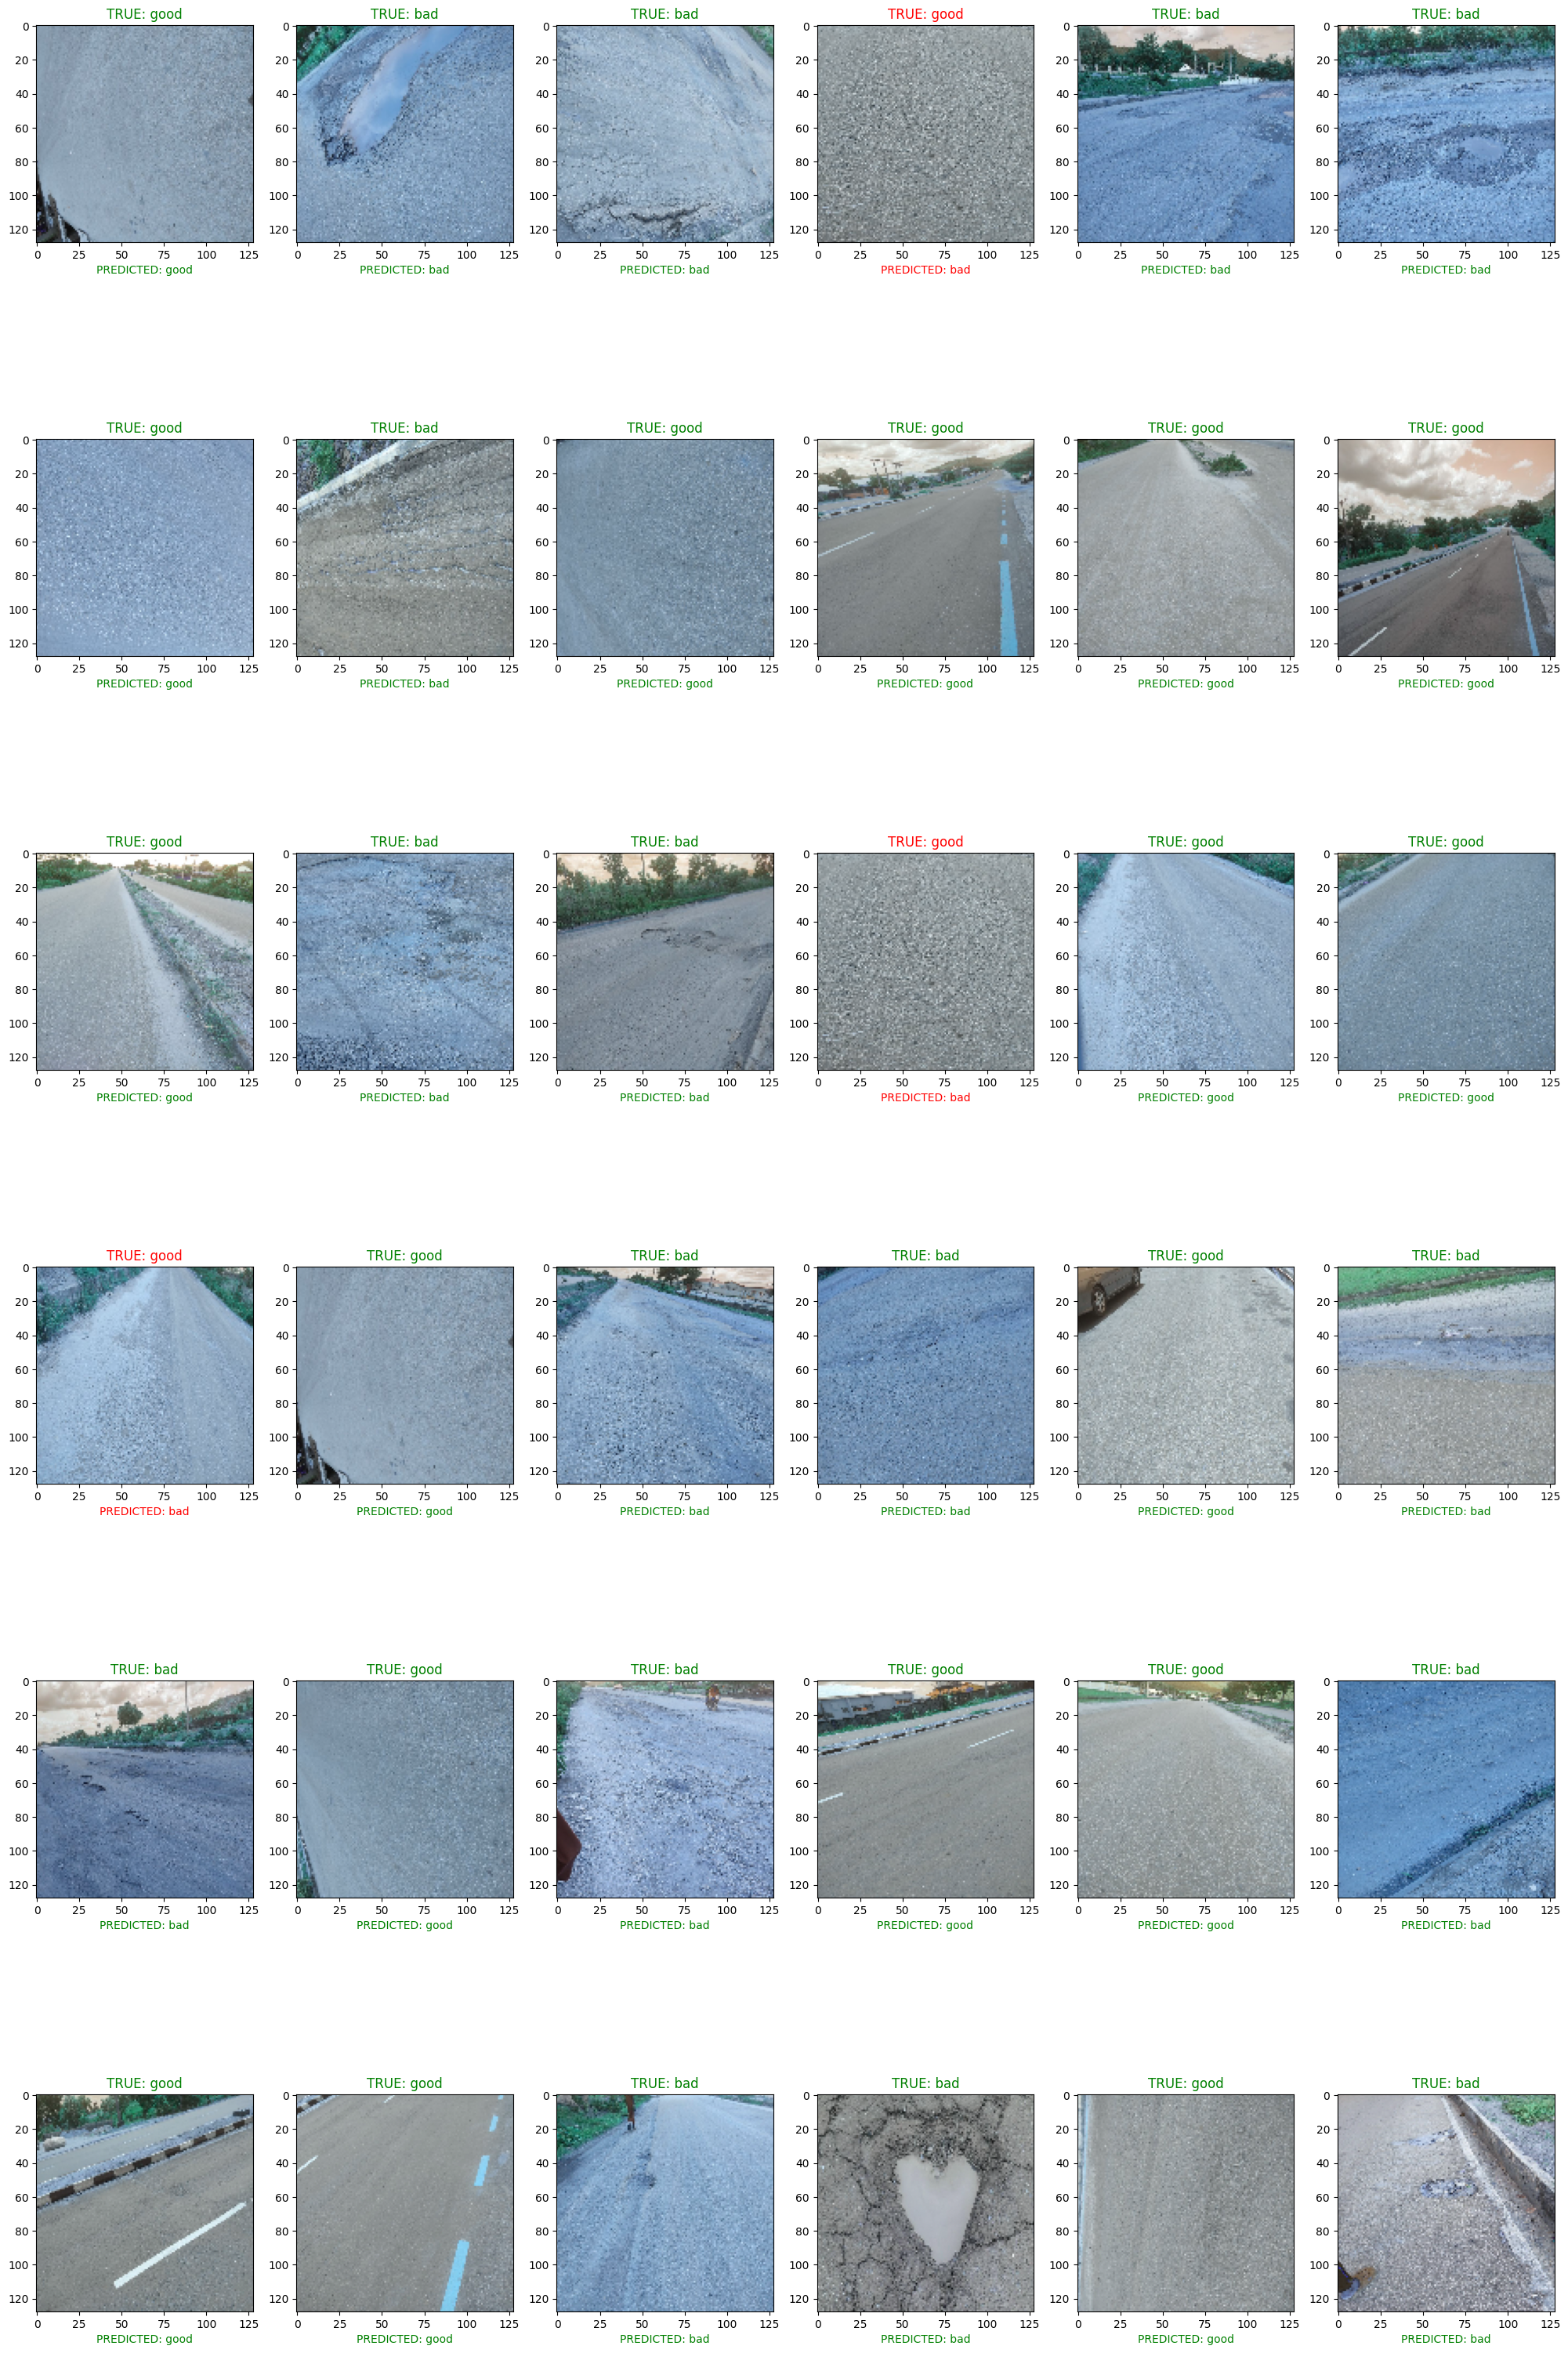

In [ ]:
import os
folder_dir = '/content/drive/MyDrive/final-dataset'
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(IMG_SIZE, IMG_SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(IMG_SIZE, IMG_SIZE, 3), cmap='gray')

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))